## CASE STUDY 1: Protien Data
#### Building a H clustering model to segment countries based on protein consumption 

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#importing libraries for machine learning
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [2]:
#importing the dataset
df = pd.read_csv('C:/Users/DELL/OneDrive/Desktop/DATA SCIENCE COURSE (Datasets)/Protein.txt')

In [3]:
df.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [4]:
df.shape

(25, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     25 non-null     object 
 1    RedMeat    25 non-null     float64
 2    WhiteMeat  25 non-null     float64
 3    Eggs       25 non-null     float64
 4    Milk       25 non-null     float64
 5    Fish       25 non-null     float64
 6    Cereals    25 non-null     float64
 7    Starch     25 non-null     float64
 8    Nuts       25 non-null     float64
 9    Fr&Veg     25 non-null     float64
dtypes: float64(9), object(1)
memory usage: 2.1+ KB


In [6]:
df.isna().sum()

Country       0
 RedMeat      0
 WhiteMeat    0
 Eggs         0
 Milk         0
 Fish         0
 Cereals      0
 Starch       0
 Nuts         0
 Fr&Veg       0
dtype: int64

In [7]:
df.describe()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,9.828000,7.896000,2.936000,17.112000,4.284000,32.248000,4.276000,3.072000,4.136000
std,3.347078,3.694081,1.117617,7.105416,3.402533,10.974786,1.634085,1.985682,1.803903
min,4.400000,1.400000,0.500000,4.900000,0.200000,18.600000,0.600000,0.700000,1.400000
25%,7.800000,4.900000,2.700000,11.100000,2.100000,24.300000,3.100000,1.500000,2.900000
50%,9.500000,7.800000,2.900000,17.600000,3.400000,28.000000,4.700000,2.400000,3.800000
75%,10.600000,10.800000,3.700000,23.300000,5.800000,40.100000,5.700000,4.700000,4.900000
max,18.000000,14.000000,4.700000,33.700000,14.200000,56.700000,6.500000,7.800000,7.900000


## Exploratory Data Analysis

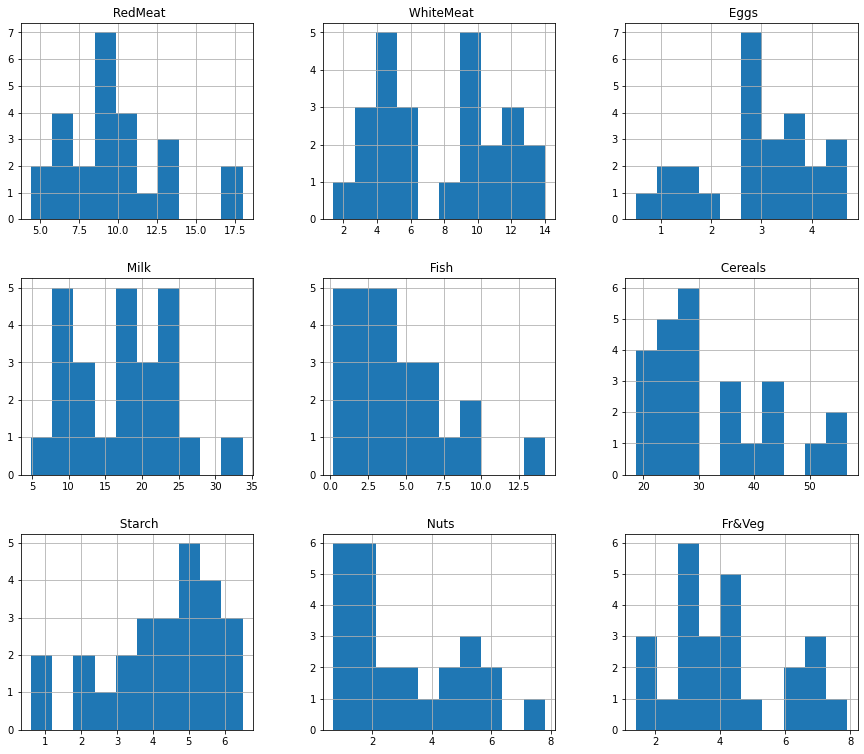

In [8]:
df.hist(bins = 10 , figsize = (15,13))
plt.show()

## Univariate Analysis

### 1. RedMeat 

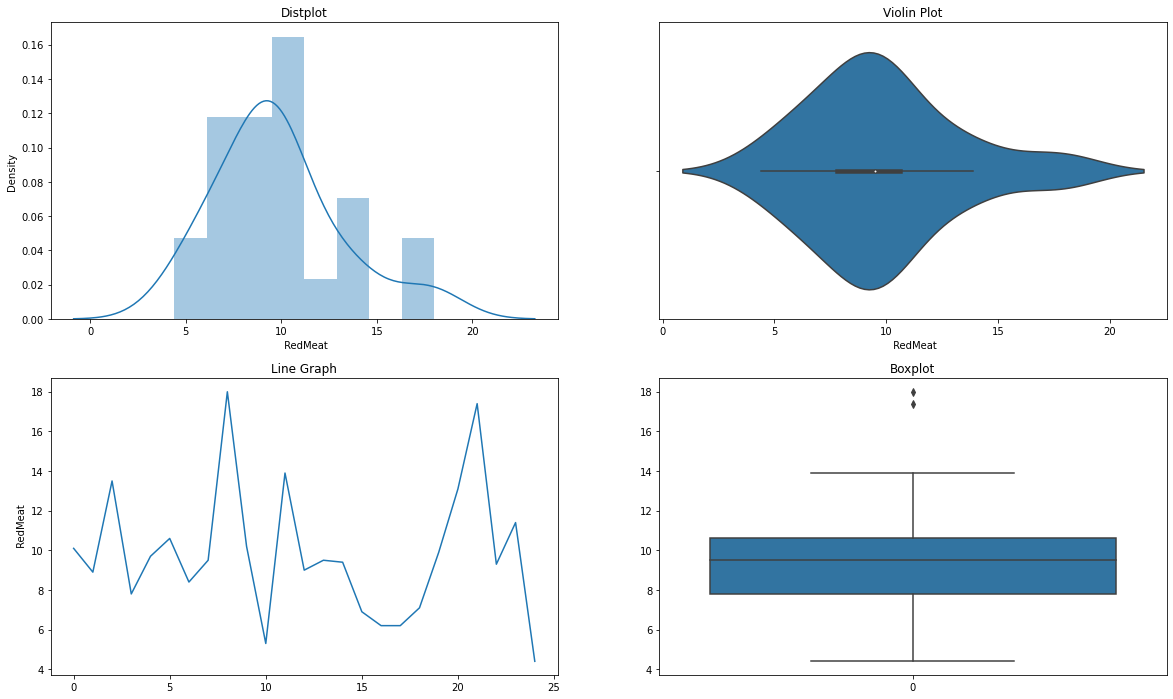

In [9]:
fig = plt.figure(figsize=(20,12))

#1
plt.subplot(2,2,1)
plt.title('Distplot')
sns.distplot(df[' RedMeat'])

#2
plt.subplot(2,2,2)
plt.title('Violin Plot')
sns.violinplot(df[' RedMeat'])

#3
plt.subplot(2,2,3)
plt.title('Line Graph')
sns.lineplot(data = df, x = df.index,y = df[' RedMeat'])

#4
plt.subplot(2,2,4)
plt.title('Boxplot')
sns.boxplot(data = df[' RedMeat'])

plt.show()

#### 1. Density Plot :-
- The graph is positively skewed.
#### 2. Violin Plot :-
- The density of data is quite high at 10.
#### 3. Line Graph :-
- Values of RedMeat consumption is high between 5-10 and at 20.
- Values of RedMeat consumption is quite low at 10 and 24.
#### 4. Box Plot :-
- Values ranges from 5 to 14 with some outliears around 18.

### Top 5 countries with highest RedMeat consumption

In [10]:
df_RedMeat = df.sort_values([' RedMeat'], ascending = False)
df_RedMeat.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
8,France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5
21,UK,17.4,5.7,4.7,20.6,4.3,24.3,4.7,3.4,3.3
11,Ireland,13.9,10.0,4.7,25.8,2.2,24.0,6.2,1.6,2.9
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
20,Switzerland,13.1,10.1,3.1,23.8,2.3,25.6,2.8,2.4,4.9


### 2. WhiteMeat

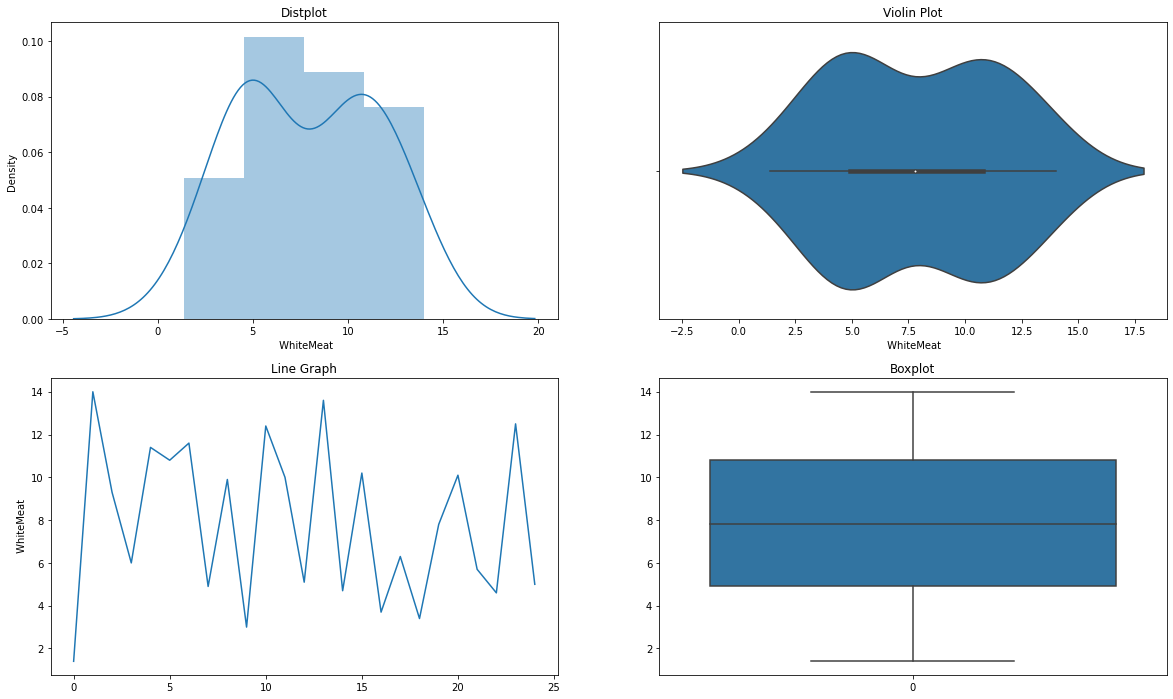

In [11]:
fig = plt.figure(figsize=(20,12))

#1
plt.subplot(2,2,1)
plt.title('Distplot')
sns.distplot(df[' WhiteMeat'])

#2
plt.subplot(2,2,2)
plt.title('Violin Plot')
sns.violinplot(df[' WhiteMeat'])

#3
plt.subplot(2,2,3)
plt.title('Line Graph')
sns.lineplot(data = df, x = df.index,y = df[' WhiteMeat'])

#4
plt.subplot(2,2,4)
plt.title('Boxplot')
sns.boxplot(data = df[' WhiteMeat'])

plt.show()

#### 1. Density Plot :-
- The graph is negatively skewed.
#### 2. Violin Plot :-
- The density of data is quite high at 5 and 11.
#### 3. Line Graph :-
- Values of WhiteMeat consumption is quite low at 0.
#### 4. Box Plot :-
- Values ranges from 0 to 14 with no outliers.

### Top 5 countries with highest WhiteMeat consumption

In [12]:
df_whiteMeat = df.sort_values([' WhiteMeat'], ascending = False)
df_whiteMeat.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
13,Netherlands,9.5,13.6,3.6,23.4,2.5,22.4,4.2,1.8,3.7
23,W Germany,11.4,12.5,4.1,18.8,3.4,18.6,5.2,1.5,3.8
10,Hungary,5.3,12.4,2.9,9.7,0.3,40.1,4.0,5.4,4.2
6,E Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6


### 3. Eggs

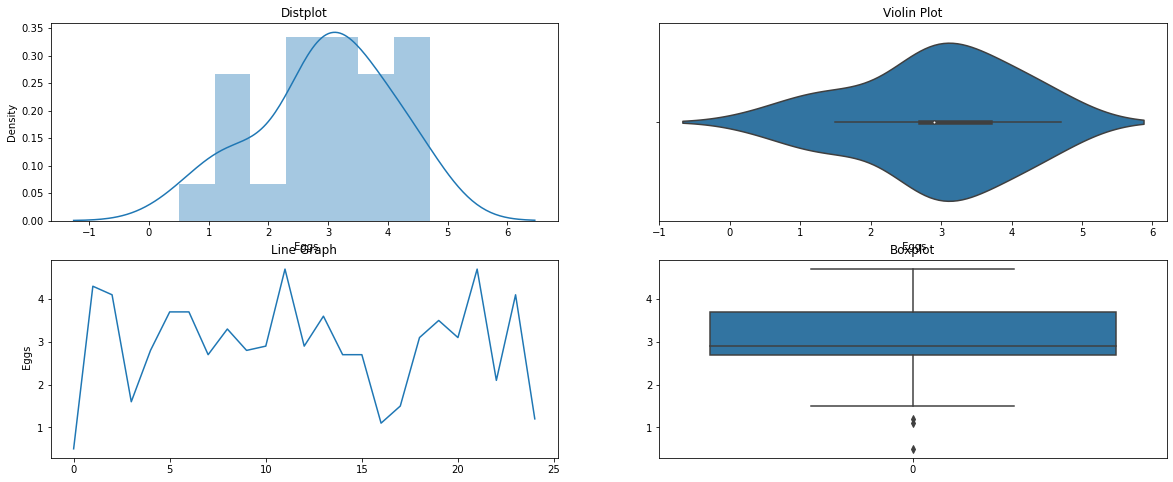

In [13]:
fig = plt.figure(figsize=(20,8))

#1
plt.subplot(2,2,1)
plt.title('Distplot')
sns.distplot(df[' Eggs'])

#2
plt.subplot(2,2,2)
plt.title('Violin Plot')
sns.violinplot(df[' Eggs'])

#3
plt.subplot(2,2,3)
plt.title('Line Graph')
sns.lineplot(data = df, x = df.index,y = df[' Eggs'])

#4
plt.subplot(2,2,4)
plt.title('Boxplot')
sns.boxplot(data = df[' Eggs'])

plt.show()

#### 1. Density Plot :-
- The graph is negatively skewed.
#### 2. Violin Plot :-
- The density of data is quite high at 3.
#### 3. Line Graph :-
- Values of Eggs consumption is quite low at 0,16 and 24.
#### 4. Box Plot :-
- Values ranges from 0.5 to nearly 5 with some outliears around 1.

### Top 5 countries with highest Eggs consumption

In [14]:
df_eggs = df.sort_values([' Eggs'], ascending = False)
df_eggs.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
11,Ireland,13.9,10.0,4.7,25.8,2.2,24.0,6.2,1.6,2.9
21,UK,17.4,5.7,4.7,20.6,4.3,24.3,4.7,3.4,3.3
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
23,W Germany,11.4,12.5,4.1,18.8,3.4,18.6,5.2,1.5,3.8
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0


### 4. Milk

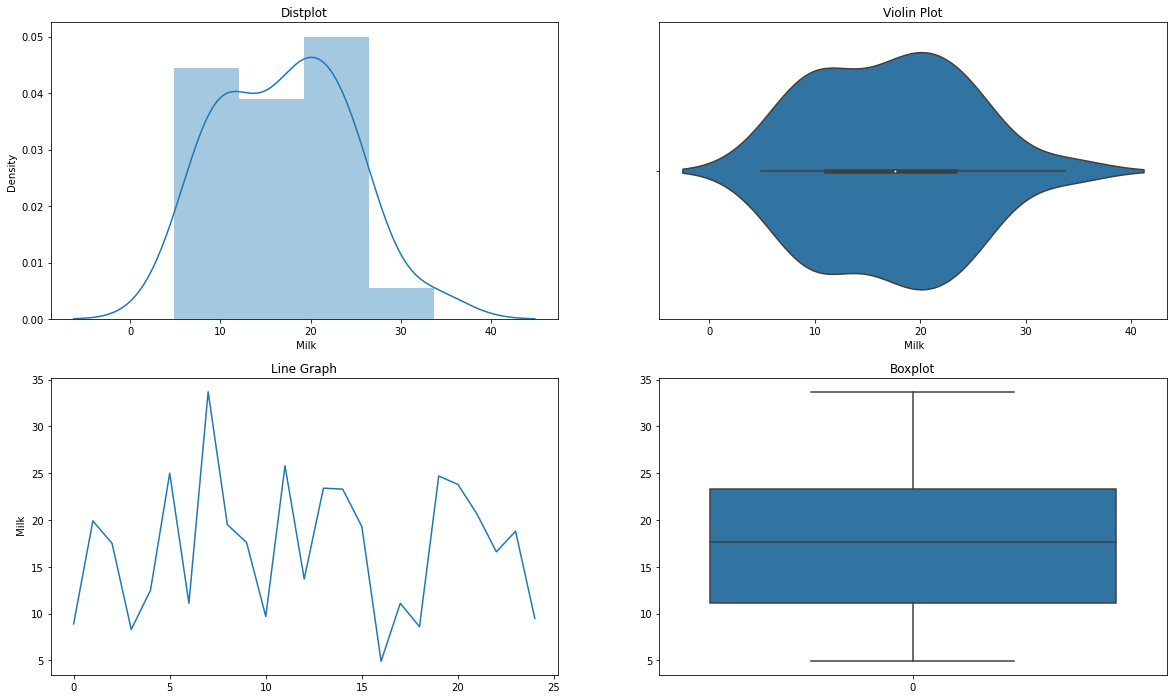

In [15]:
fig = plt.figure(figsize=(20,12))

#1
plt.subplot(2,2,1)
plt.title('Distplot')
sns.distplot(df[' Milk'])

#2
plt.subplot(2,2,2)
plt.title('Violin Plot')
sns.violinplot(df[' Milk'])

#3
plt.subplot(2,2,3)
plt.title('Line Graph')
sns.lineplot(data = df, x = df.index,y = df[' Milk'])

#4
plt.subplot(2,2,4)
plt.title('Boxplot')
sns.boxplot(data = df[' Milk'])

plt.show()

#### 1. Density Plot :-
- The graph is positively skewed.
#### 2. Violin Plot :-
- The density of data is quite high at 10 and 20.
#### 3. Line Graph :-
- Values of milk consumption is lowest at 16.
#### 4. Box Plot :-
- Values ranges from 5 to 35 with no outliers.

### Top 5 countries with highest Milk consumption

In [16]:
df_milk = df.sort_values([' Milk'], ascending = False)
df_milk.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
7,Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4
11,Ireland,13.9,10.0,4.7,25.8,2.2,24.0,6.2,1.6,2.9
5,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4
19,Sweden,9.9,7.8,3.5,24.7,7.5,19.5,3.7,1.4,2.0
20,Switzerland,13.1,10.1,3.1,23.8,2.3,25.6,2.8,2.4,4.9


### 5. Fish

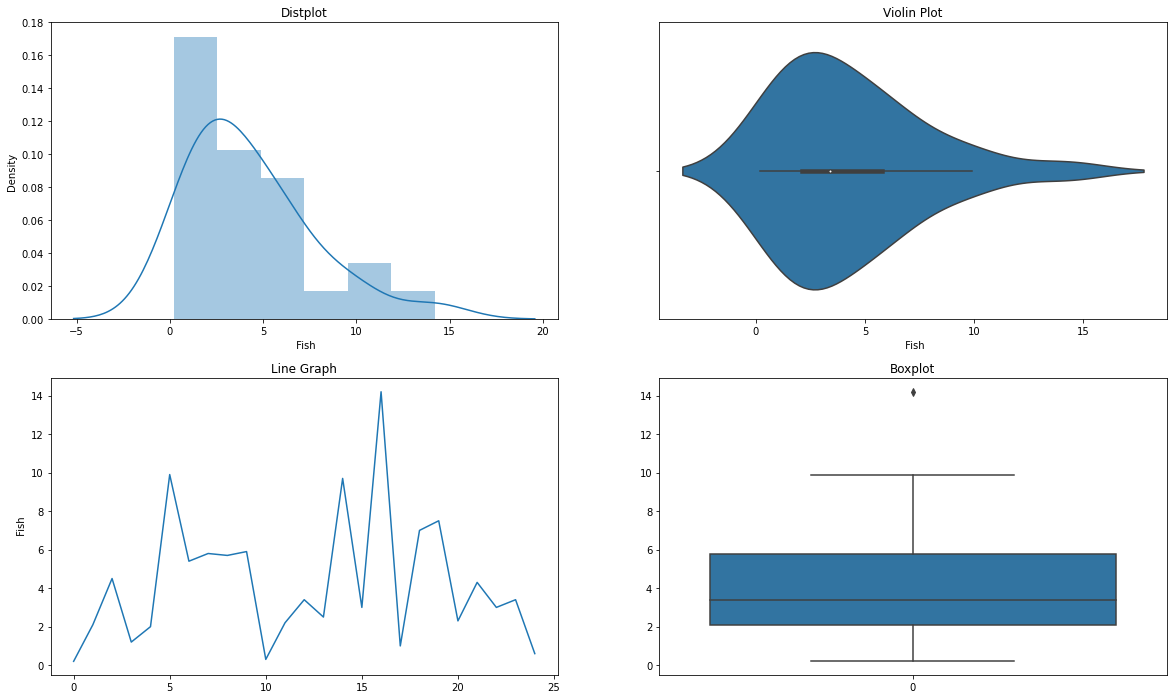

In [17]:
fig = plt.figure(figsize=(20,12))

#1
plt.subplot(2,2,1)
plt.title('Distplot')
sns.distplot(df[' Fish'])

#2
plt.subplot(2,2,2)
plt.title('Violin Plot')
sns.violinplot(df[' Fish'])

#3
plt.subplot(2,2,3)
plt.title('Line Graph')
sns.lineplot(data = df, x = df.index,y = df[' Fish'])

#4
plt.subplot(2,2,4)
plt.title('Boxplot')
sns.boxplot(data = df[' Fish'])

plt.show()

#### 1. Density Plot :-
- The graph is positively skewed.
#### 2. Violin Plot :-
- The density of data is quite high at 3.
#### 3. Line Graph :-
- Values of fish consumption is quite low at 0,10 and 24.
#### 4. Box Plot :-
- Values ranges from 0 to 10 with some outliers around 14.

### Top 5 countries with highest Fish consumption

In [18]:
df_fish = df.sort_values([' Fish'], ascending = False)
df_fish.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
16,Portugal,6.2,3.7,1.1,4.9,14.2,27.0,5.9,4.7,7.9
5,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4
14,Norway,9.4,4.7,2.7,23.3,9.7,23.0,4.6,1.6,2.7
19,Sweden,9.9,7.8,3.5,24.7,7.5,19.5,3.7,1.4,2.0
18,Spain,7.1,3.4,3.1,8.6,7.0,29.2,5.7,5.9,7.2


### 6. Cereals

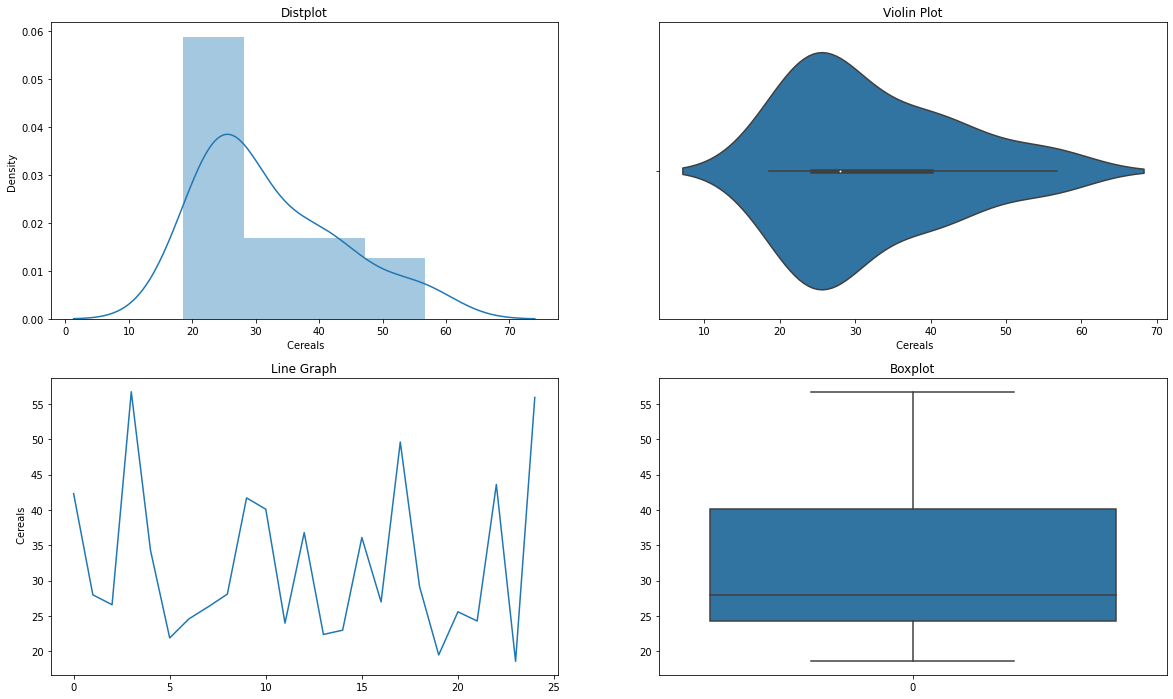

In [19]:
fig = plt.figure(figsize=(20,12))

#1
plt.subplot(2,2,1)
plt.title('Distplot')
sns.distplot(df[' Cereals'])

#2
plt.subplot(2,2,2)
plt.title('Violin Plot')
sns.violinplot(df[' Cereals'])

#3
plt.subplot(2,2,3)
plt.title('Line Graph')
sns.lineplot(data = df, x = df.index,y = df[' Cereals'])

#4
plt.subplot(2,2,4)
plt.title('Boxplot')
sns.boxplot(data = df[' Cereals'])

plt.show()

#### 1. Density Plot :-
- The graph is positively skewed.
#### 2. Violin Plot :-
- The density of data is quite high at 22.
#### 3. Line Graph :-
- Values of cereals consumption is quite low at 19 and 23.
#### 4. Box Plot :-
- Values ranges from 20 to 56 with no outliers.

### Top 5 countries with highest Cereals consumption

In [20]:
df_cereals = df.sort_values([' Cereals'], ascending = False)
df_cereals.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
24,Yugoslavia,4.4,5.0,1.2,9.5,0.6,55.9,3.0,5.7,3.2
17,Romania,6.2,6.3,1.5,11.1,1.0,49.6,3.1,5.3,2.8
22,USSR,9.3,4.6,2.1,16.6,3.0,43.6,6.4,3.4,2.9
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7


### 7. Starch

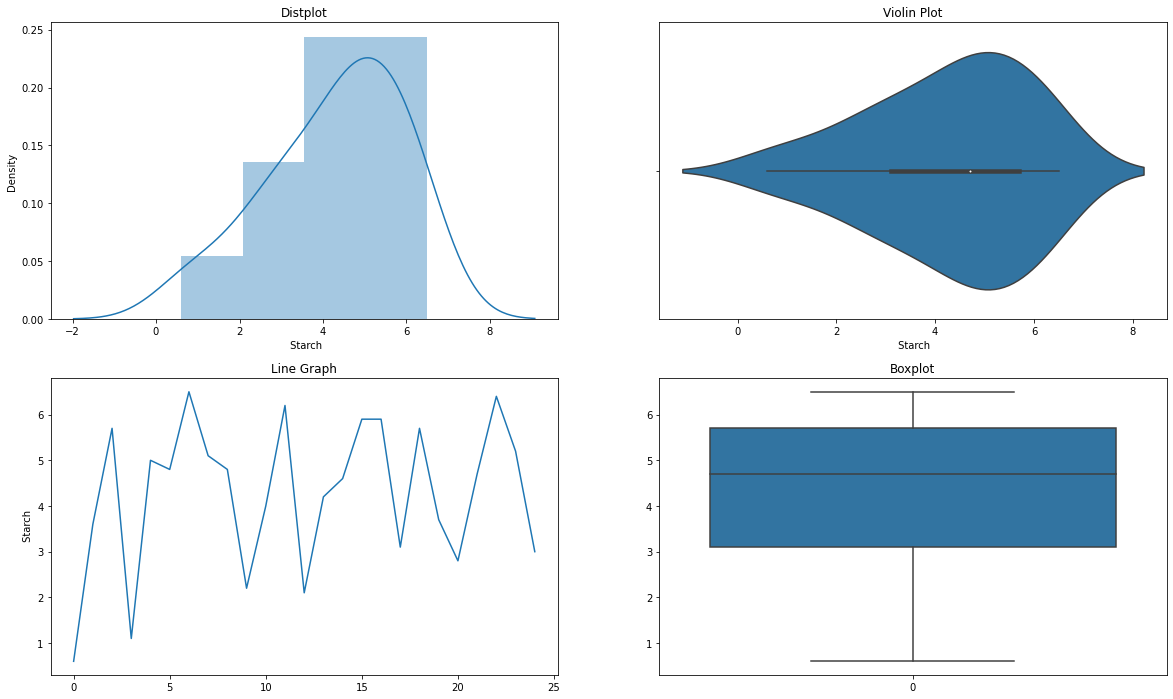

In [21]:
fig = plt.figure(figsize=(20,12))

#1
plt.subplot(2,2,1)
plt.title('Distplot')
sns.distplot(df[' Starch'])

#2
plt.subplot(2,2,2)
plt.title('Violin Plot')
sns.violinplot(df[' Starch'])

#3
plt.subplot(2,2,3)
plt.title('Line Graph')
sns.lineplot(data = df, x = df.index,y = df[' Starch'])

#4
plt.subplot(2,2,4)
plt.title('Boxplot')
sns.boxplot(data = df[' Starch'])

plt.show()

#### 1. Density Plot :-
- The graph is negatively skewed.
#### 2. Violin Plot :-
- The density of data is quite high at 5.
#### 3. Line Graph :-
- Values of starch consumption is quite low at 0 and 3.
#### 4. Box Plot :-
- Values ranges from 0 to 7 with no outliers.

### Top 5 countries with highest Starch consumption

In [22]:
df_starch = df.sort_values([' Starch'], ascending = False)
df_starch.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
6,E Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6
22,USSR,9.3,4.6,2.1,16.6,3.0,43.6,6.4,3.4,2.9
11,Ireland,13.9,10.0,4.7,25.8,2.2,24.0,6.2,1.6,2.9
15,Poland,6.9,10.2,2.7,19.3,3.0,36.1,5.9,2.0,6.6
16,Portugal,6.2,3.7,1.1,4.9,14.2,27.0,5.9,4.7,7.9


### 8. Nuts

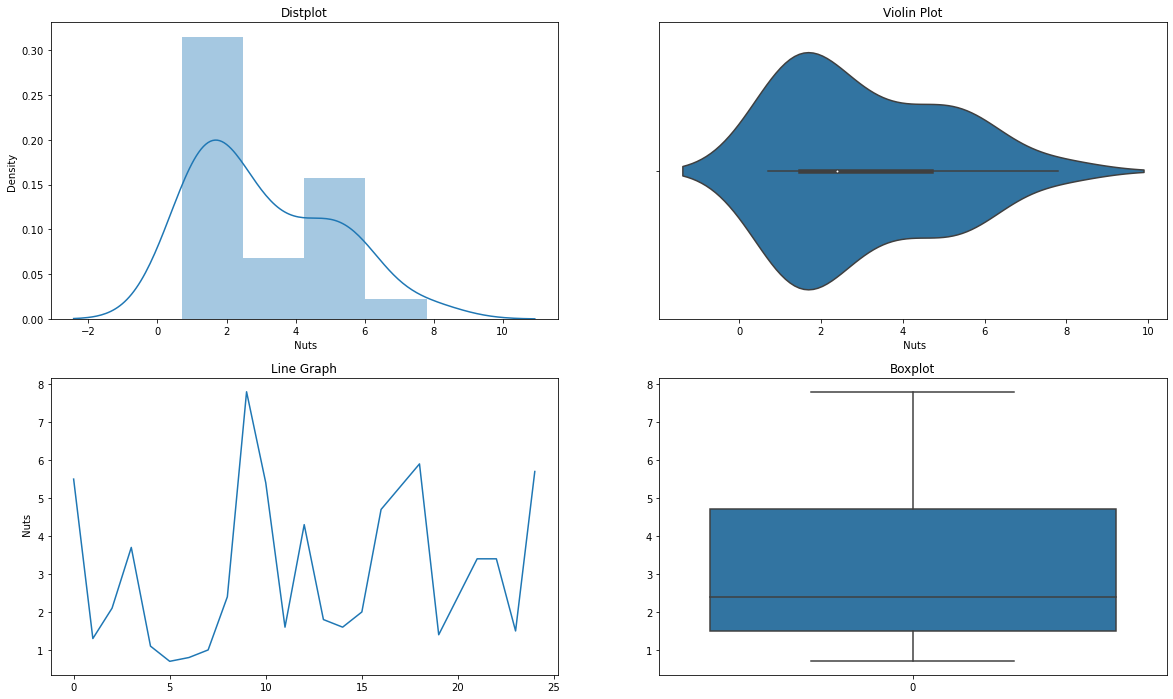

In [23]:
fig = plt.figure(figsize=(20,12))

#1
plt.subplot(2,2,1)
plt.title('Distplot')
sns.distplot(df[' Nuts'])

#2
plt.subplot(2,2,2)
plt.title('Violin Plot')
sns.violinplot(df[' Nuts'])

#3
plt.subplot(2,2,3)
plt.title('Line Graph')
sns.lineplot(data = df, x = df.index,y = df[' Nuts'])

#4
plt.subplot(2,2,4)
plt.title('Boxplot')
sns.boxplot(data = df[' Nuts'])

plt.show()

#### 1. Density Plot :-
- The graph is positively skewed.
#### 2. Violin Plot :-
- The density of data is quite high at 1.
#### 3. Line Graph :-
- Values of nuts consumption is quite low from 4 to 7
#### 4. Box Plot :-
- Values ranges from 0 to 8 with no outliers.

### Top 5 countries with highest Nuts consumption

In [24]:
df_nuts = df.sort_values([' Nuts'], ascending = False)
df_nuts.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
9,Greece,10.2,3.0,2.8,17.6,5.9,41.7,2.2,7.8,6.5
18,Spain,7.1,3.4,3.1,8.6,7.0,29.2,5.7,5.9,7.2
24,Yugoslavia,4.4,5.0,1.2,9.5,0.6,55.9,3.0,5.7,3.2
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
10,Hungary,5.3,12.4,2.9,9.7,0.3,40.1,4.0,5.4,4.2


### 9. Fr&Veg

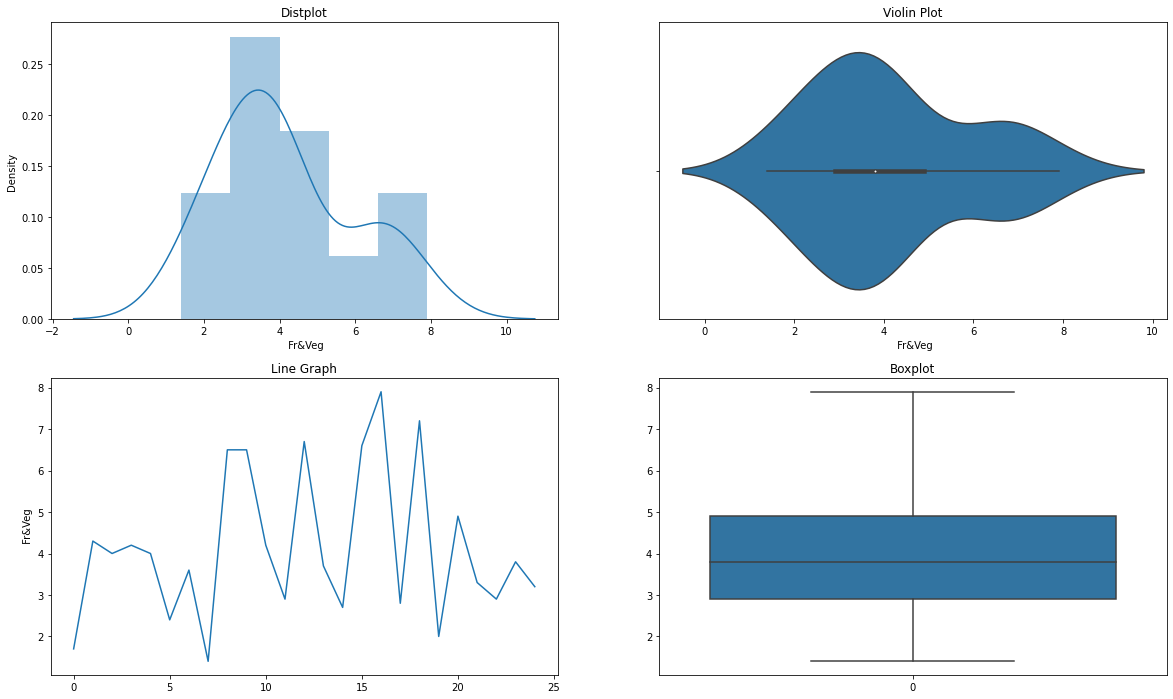

In [25]:
fig = plt.figure(figsize=(20,12))

#1
plt.subplot(2,2,1)
plt.title('Distplot')
sns.distplot(df[' Fr&Veg'])

#2
plt.subplot(2,2,2)
plt.title('Violin Plot')
sns.violinplot(df[' Fr&Veg'])

#3
plt.subplot(2,2,3)
plt.title('Line Graph')
sns.lineplot(data = df, x = df.index,y = df[' Fr&Veg'])

#4
plt.subplot(2,2,4)
plt.title('Boxplot')
sns.boxplot(data = df[' Fr&Veg'])

plt.show()

#### 1. Density Plot :-
- The graph is positively skewed.
#### 2. Violin Plot :-
- The density of data is quite high at 3.
#### 3. Line Graph :-
- Values of Fr&Veg consumption is quite low at 0 and 7.
#### 4. Box Plot :-
- Values ranges from 0 to 8 with no outliers.

### Top 5 countries with highest Fr&Veg consumption

In [26]:
df_Fr = df.sort_values([' Fr&Veg'], ascending = False)
df_Fr.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
16,Portugal,6.2,3.7,1.1,4.9,14.2,27.0,5.9,4.7,7.9
18,Spain,7.1,3.4,3.1,8.6,7.0,29.2,5.7,5.9,7.2
12,Italy,9.0,5.1,2.9,13.7,3.4,36.8,2.1,4.3,6.7
15,Poland,6.9,10.2,2.7,19.3,3.0,36.1,5.9,2.0,6.6
8,France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5


## Bivariate Analysis

<AxesSubplot:>

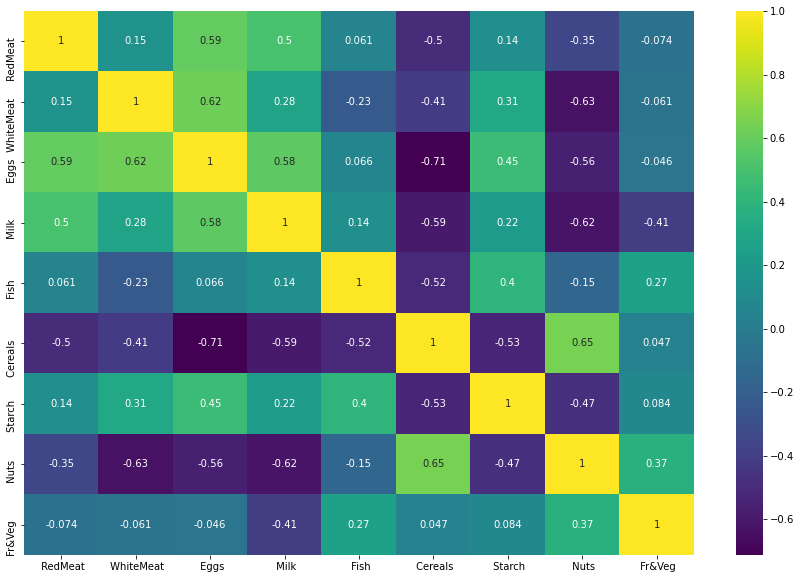

In [27]:
plt.figure(figsize = (15,10))
correlation = df.corr()
sns.heatmap(correlation , annot = True , cmap = 'viridis')

## Building a H clustering model

In [28]:
#dropping country column for data scaling
df.drop('Country',axis = 1,inplace = True)

### Data Scaling

In [29]:
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled , columns = df.columns)
data_scaled.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,0.225490,0.031256,0.011163,0.198699,0.004465,0.944380,0.013395,0.122792,0.037954
1,0.228939,0.360129,0.110611,0.511898,0.054019,0.720259,0.092605,0.033441,0.110611
2,0.364398,0.251030,0.110669,0.472368,0.121466,0.717999,0.153857,0.056684,0.107970
3,0.133433,0.102640,0.027371,0.141986,0.020528,0.969952,0.018817,0.063295,0.071848
4,0.241683,0.284039,0.069764,0.311447,0.049831,0.854610,0.124579,0.027407,0.099663


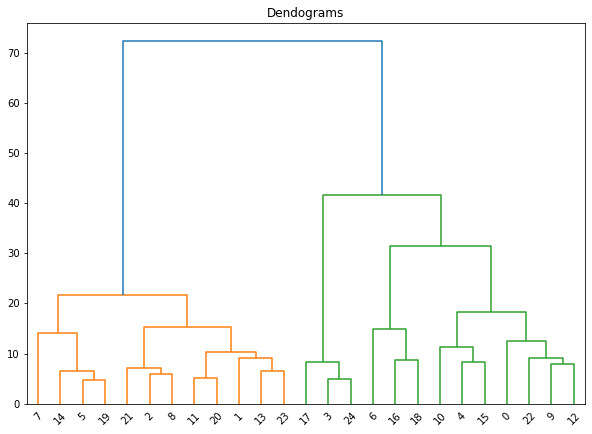

In [30]:
#building dendegram to determine the optimal no of clusters
plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))

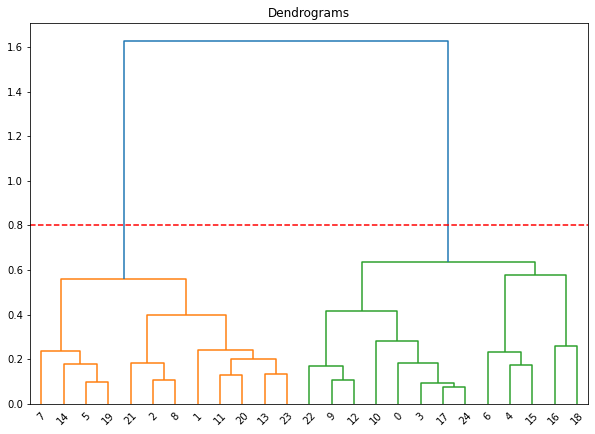

In [31]:
plt.figure(figsize = (10,7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled , method = 'ward'))
plt.axhline(y = 0.8 , color = 'r',linestyle = '--')

#### From the above dendrogram, it can be observed that two clusters can be formed

In [32]:
#forming two clusters
cluster = AgglomerativeClustering(n_clusters = 2 , affinity = 'euclidean' , linkage = 'ward')
cluster.fit_predict(data_scaled)

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0], dtype=int64)

### Visualizing the clusters

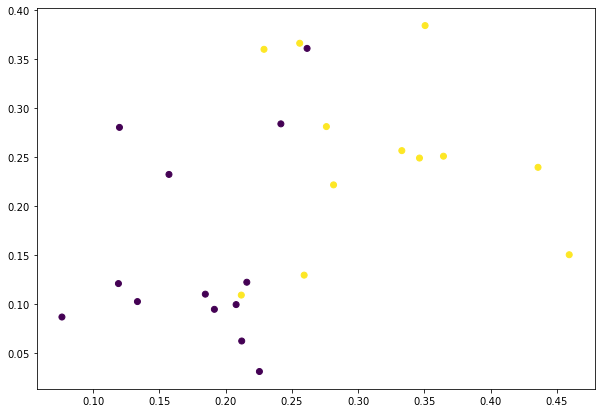

In [33]:
plt.figure(figsize = (10,7))
plt.scatter(data_scaled[' RedMeat'] , data_scaled[' WhiteMeat'] , c = cluster.labels_)